# Simple Julia ODE solver

In [1]:
using Plots
using Printf
using DifferentialEquations
using DataFrames
using CSV
using Noise

The next chunk of code sets up and does the solving of the ODE. This example solves the simple harmonic oscillator $\ddot{x} = -kx$. Here we employ the trick of writing a second order ODE as two coupled first order ODEs by defining $$du = \dot{x}$$

then $$\dot{du} = \ddot{x}$$

substituting  $\ddot{x} = -kx$ our second order ODE has become the system:

$$\dot{x} = du$$

$$\dot{du} = -kx$$

which we can solve simultaneously. Here we choose the Runge-Kutta fourth order integration method.

In [2]:
# Parameters
const k = 3

#Initial Conditions and time setup
u₀ = [0.0, 1.5] # xdot_0, x_0,
tspan = (0.0, 5)

#Define the problem - this is the main part that changes with each differential equation
function diffyqs(du, u, p, t)
    x = u[1]
    xdot = u[2]
    du[1] = xdot
    du[2] = -k*x # actual diffq of interest ( in 2nd order case)
    # could add many more diffyqs here if need be
end

# Pass to solvers
prob = ODEProblem(diffyqs, u₀, tspan)
sol = solve(prob, RK4()) # <3 RK4
print()

Let's plot the results:

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


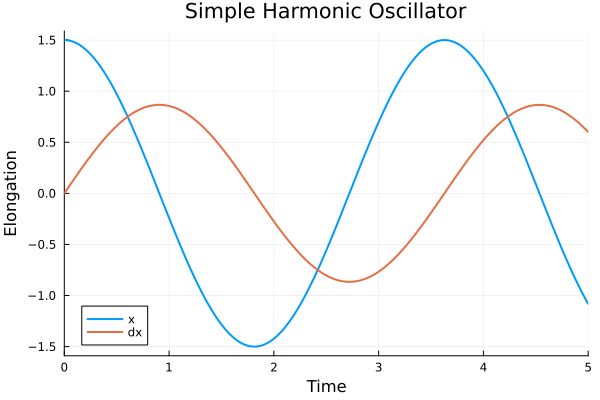

In [3]:
# Plot
plot(sol, vars = [2, 1], linewidth = 2, title = "Simple Harmonic Oscillator",
     xaxis = "Time", yaxis = "Elongation", label = ["x" "dx"])

If you'd like to unpack this solution further, it can be done like this:

(from [here](https://docs.sciml.ai/DiffEqDocs/stable/basics/solution/#solution))

In [4]:
t = sol.t
sol_values = sol.u

x = sol[2,:]
xdot = sol[1,:]
print()

Exporting data to CSV:

In [5]:
df = DataFrame(sol)
#CSV.write("C:\\Users\\walki\\Desktop\\Juila\\export_df_test.csv",df) 
print()

In [6]:
# example of higher order system differential equation funciton
function diffyqs(du, u, p, t)
    x = u[1]
    y = u[2]
    dx = u[3]
    dy = u[4]
    du[1] = dx
    du[2] = dy
    du[3] = -x - 2x * y
    du[4] = y^2 - y - x^2
end
print()

## Generating Challenge data

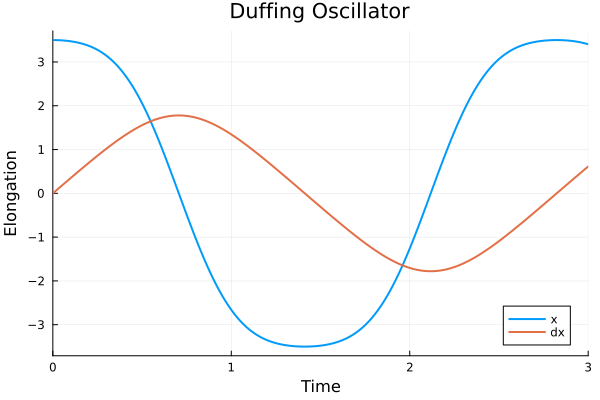

In [17]:
# Parameters
ε = 1.5

#Initial Conditions and time setup
u₀ = [0.0, 3.5] # xdot_0, x_0,
tspan = (0.0, 3)

#Define the problem - this is the main part that changes with each differential equation
function diffyqs(du, u, p, t)
    x = u[1]
    xdot = u[2]
    du[1] = xdot
    du[2] = -ε*x - ε*x^3 # actual diffq of interest ( in 2nd order case)
    # could add many more diffyqs here if need be
end

# Pass to solvers
prob = ODEProblem(diffyqs, u₀, tspan)
sol = solve(prob, RK4()) # <3 RK4

# Plot
plot(sol, vars = [2, 1], linewidth = 2, title = "Duffing Oscillator",
     xaxis = "Time", yaxis = "Elongation", label = ["x" "dx"])

In [26]:
x = sol[2,:]
t = sol.t

x_noisy = add_gauss(x, 0.2, 0.0)

print()

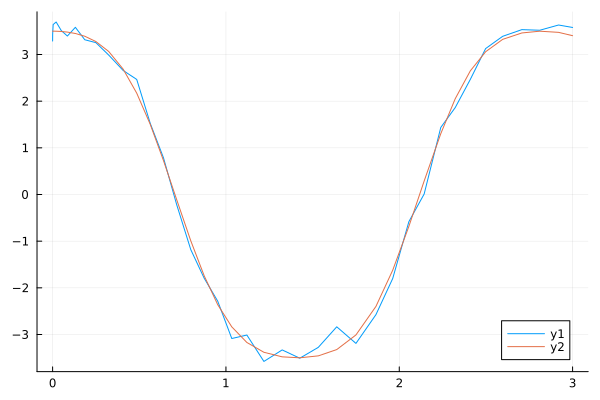

In [27]:
plot(t,[x_noisy,x])

In [31]:
df = DataFrame(sol)
df = DataFrame(time =t,data = x_noisy)
CSV.write("C:\\Users\\walki\\Desktop\\Juila\\duffing_oscillator_data_noisy.csv",df) 
print()

Row,time,data
,Float64,Float64
1,0.0,3.28835
2,0.000285633,3.43259
3,0.00314196,3.64292
4,0.0203893,3.69648
5,0.0498256,3.5132
6,0.085094,3.39555
7,0.131279,3.58262
8,0.18548,3.31626
9,0.249614,3.25388
